<a href="https://colab.research.google.com/github/blackcrowX/Data_Analysis_Projects/blob/main/Python/Visualisation_Page_View_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:<div align="center">
<h1>Visualisation - Page View Time Series</h1>
<img src="https://i.postimg.cc/K8mbkyhz/Logo-Black.png"/>
</div>

## Table of Contents
* Introduction
* Setup
  * Import Libraries
  * Import Data
* Data Visualisation
  * Data Cleaning
  * Draw Line Plot
  * Draw Bar Plot
  * Draw Box Plot

<h1 align="center">Introduction</h1>

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth. The dataset was published by <a href="https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer">freeCodeCamp</a>.

<h1 align="center">Setup</h1>

## Step 1: Import Libraries

Import and configure libraries required for data analysis.

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

## Step 2: Import Dataset
Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the `date` column.

In [ ]:
url = "https://raw.githubusercontent.com/blackcrowX/Data-Analysis-Projects/main/Python/Page_View_Time_Series_Visualiser/fcc_forum_pageviews.csv"
df = pd.read_csv(url)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')

<h1 align="center">Data Visualisation</h1>

## Step 3: Data Cleaning

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

## Step 4: Draw Line plot

Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.

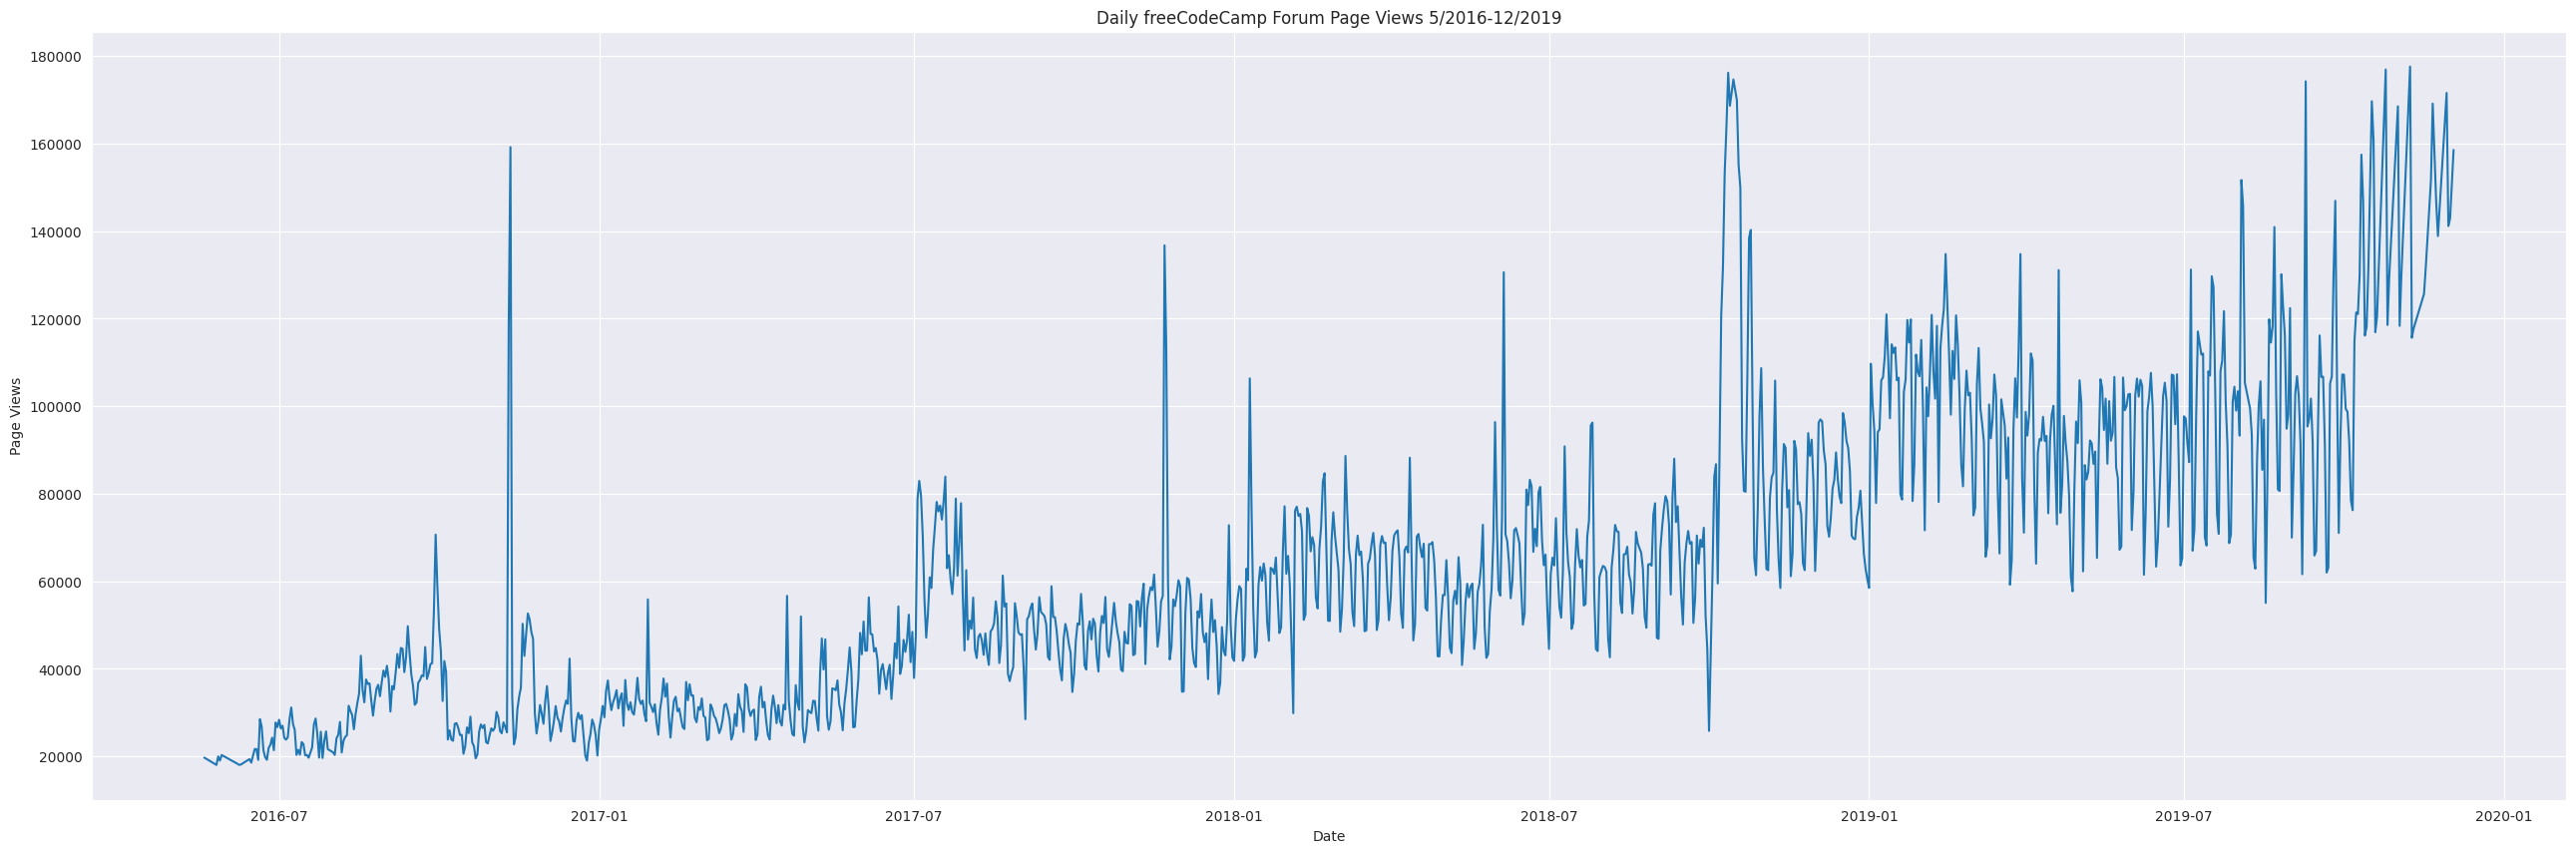

In [ ]:
f, ax = plt.subplots(figsize=(32, 10), dpi=100)
ax = sns.lineplot(data=df, legend=False).set(xlabel ="Date", ylabel = "Page Views", title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.savefig("line_plot.png")

## Step 5: Draw Bar Plot

Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of `Months`. On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.

In [ ]:
df_bar = df.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
}

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

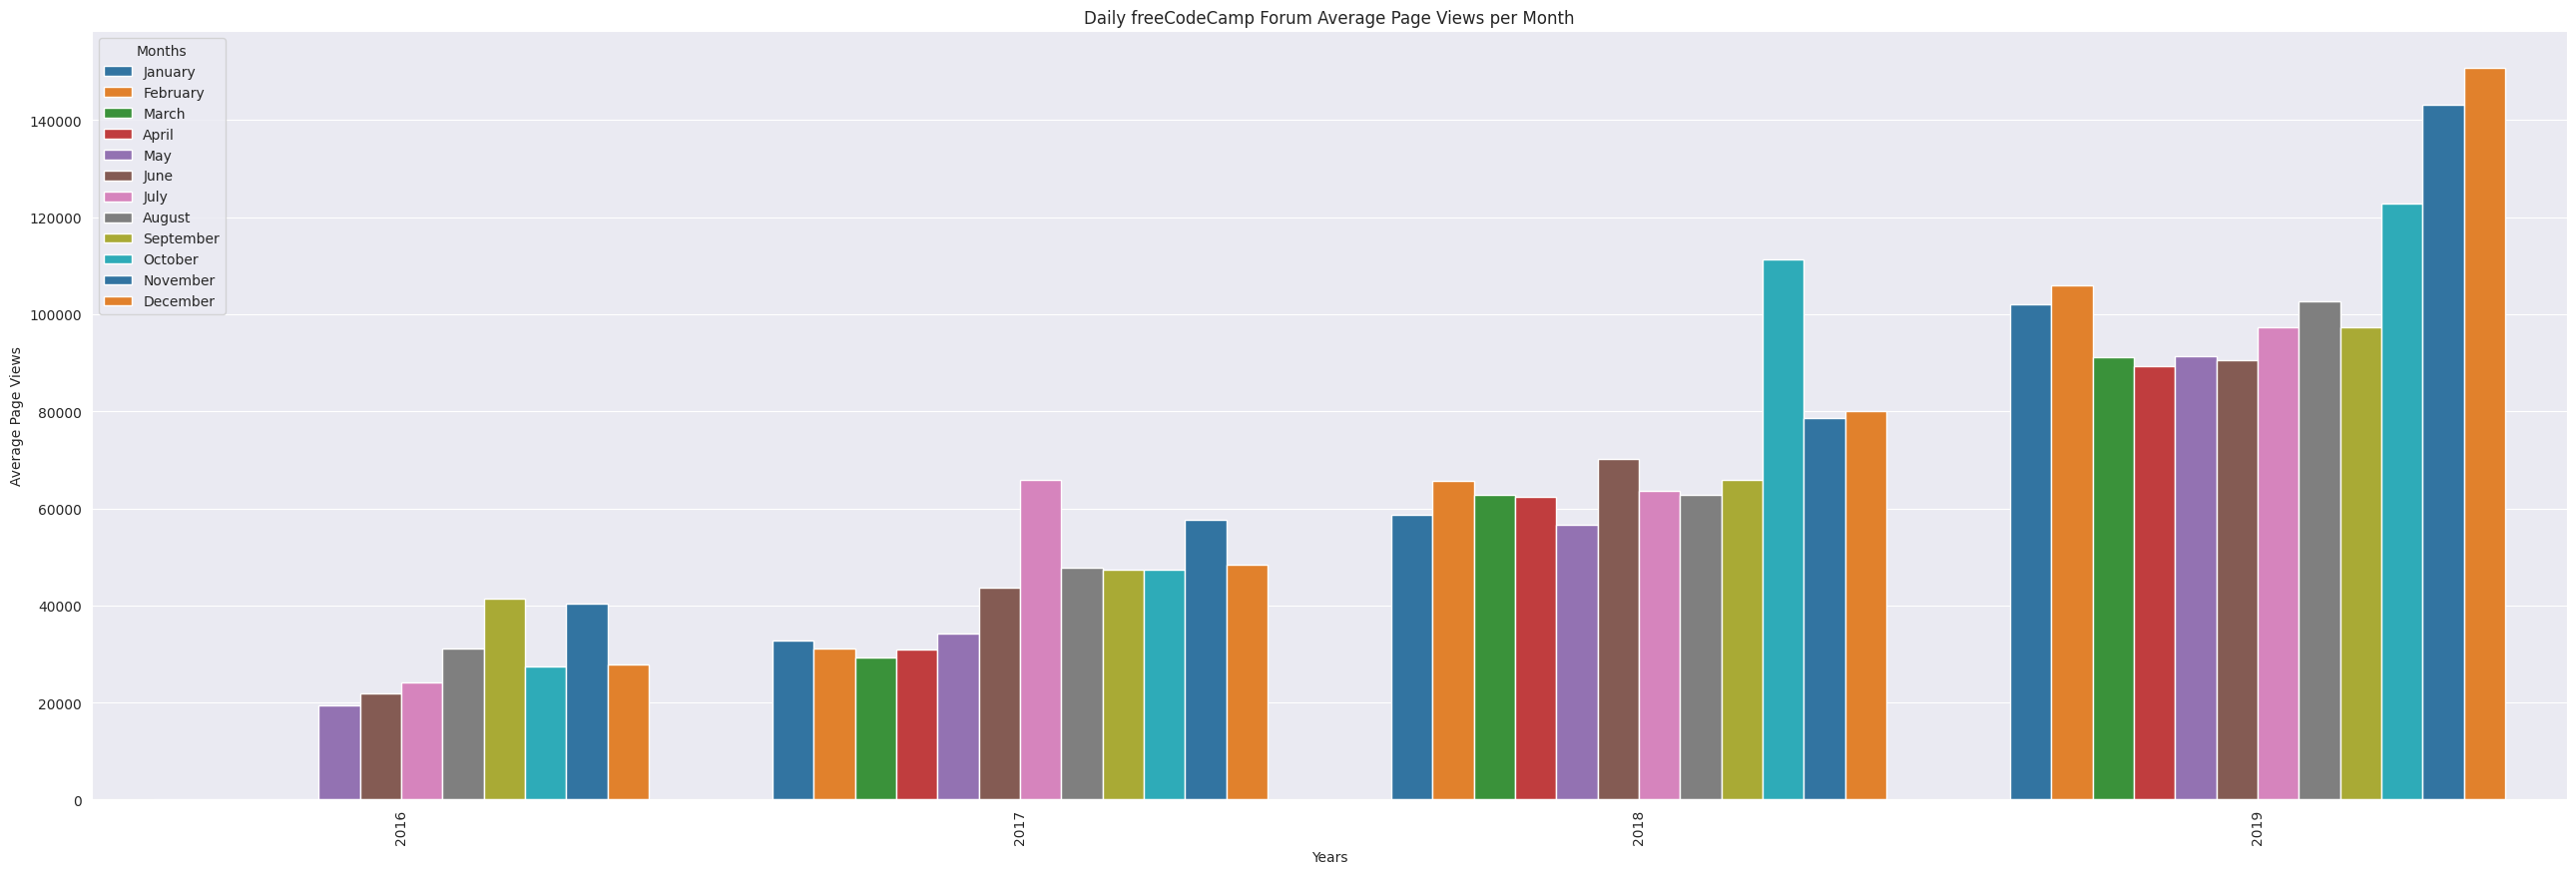

In [ ]:
f, ax = plt.subplots(figsize=(32, 10), dpi=100)
plt.title("Daily freeCodeCamp Forum Average Page Views per Month")

ax = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment="center")

plt.savefig("bar_plot.png")

## Step 6: Draw Box Plot

Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`. Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

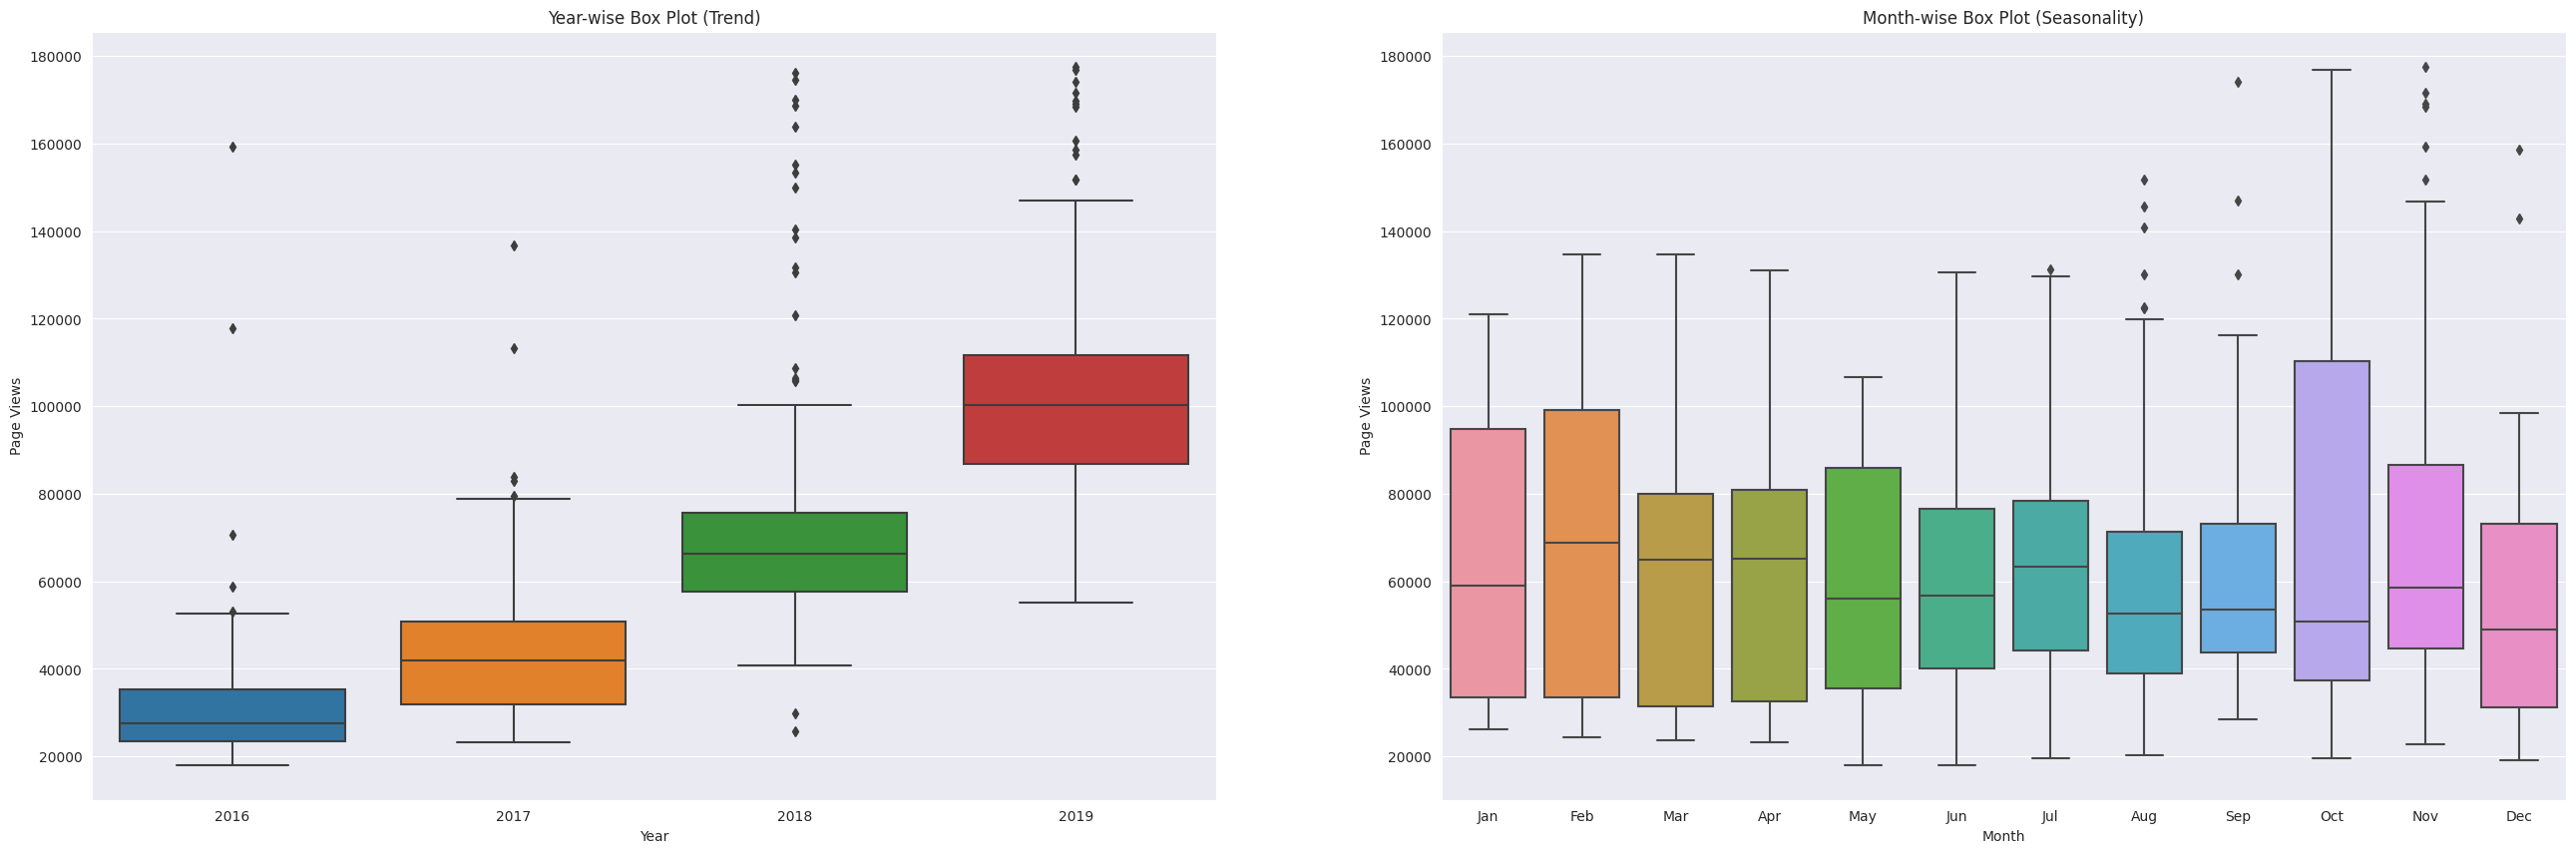

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)

sns.boxplot(ax=axes[0], data=df_box, x="year", y="value")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

sns.boxplot(ax=axes[1], data=df_box, x="month", y="value", order=month_order)
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

plt.savefig('box_plot.png')